First few rows of the dataset:
  Ticker        Date        Open        High         Low       Close  \
0   AAPL  2023-02-07  150.639999  155.229996  150.639999  154.649994   
1   AAPL  2023-02-08  153.880005  154.580002  151.169998  151.919998   
2   AAPL  2023-02-09  153.779999  154.330002  150.419998  150.869995   
3   AAPL  2023-02-10  149.460007  151.339996  149.220001  151.009995   
4   AAPL  2023-02-13  150.949997  154.259995  150.919998  153.850006   

    Adj Close    Volume  
0  154.414230  83322600  
1  151.688400  64120100  
2  150.639999  56007100  
3  151.009995  57450700  
4  153.850006  62199000  

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 248 entries, 0 to 247
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Ticker     248 non-null    object 
 1   Date       248 non-null    object 
 2   Open       248 non-null    float64
 3   High       248 non-null    float64
 4   Low        248 n

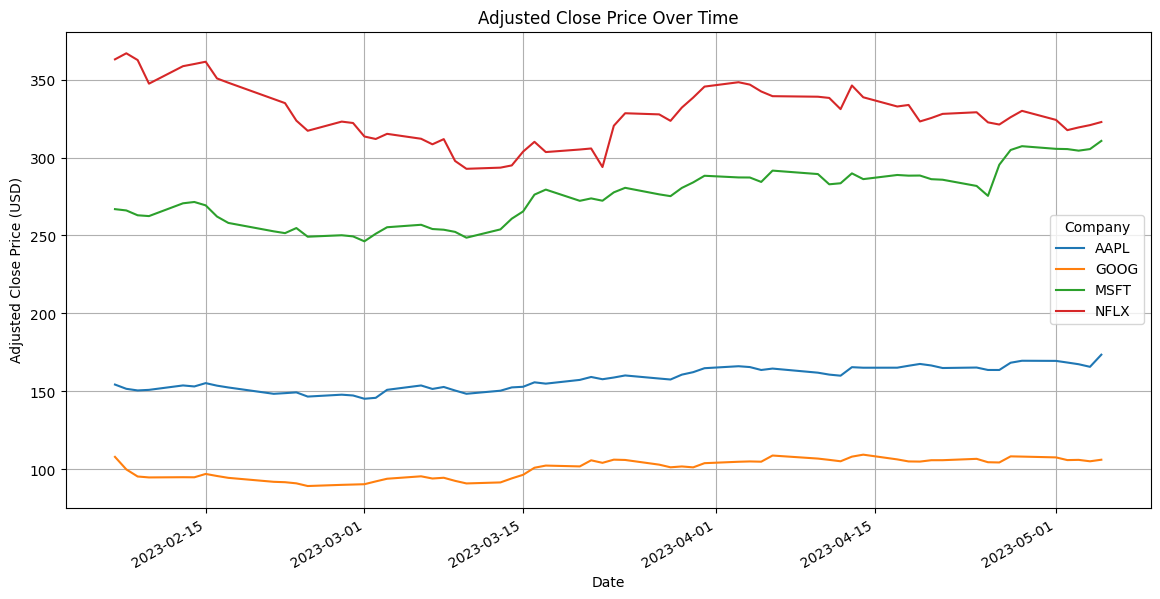


First few rows of Daily Returns:
Ticker          AAPL      GOOG      MSFT      NFLX
Date                                              
2023-02-08 -0.017653 -0.074417 -0.003102  0.010690
2023-02-09 -0.006912 -0.045400 -0.011660 -0.011804
2023-02-10  0.002456 -0.006285 -0.001973 -0.041766
2023-02-13  0.018807  0.001476  0.031243  0.032272
2023-02-14 -0.004225 -0.000526  0.003133  0.003876


<Figure size 1400x700 with 0 Axes>

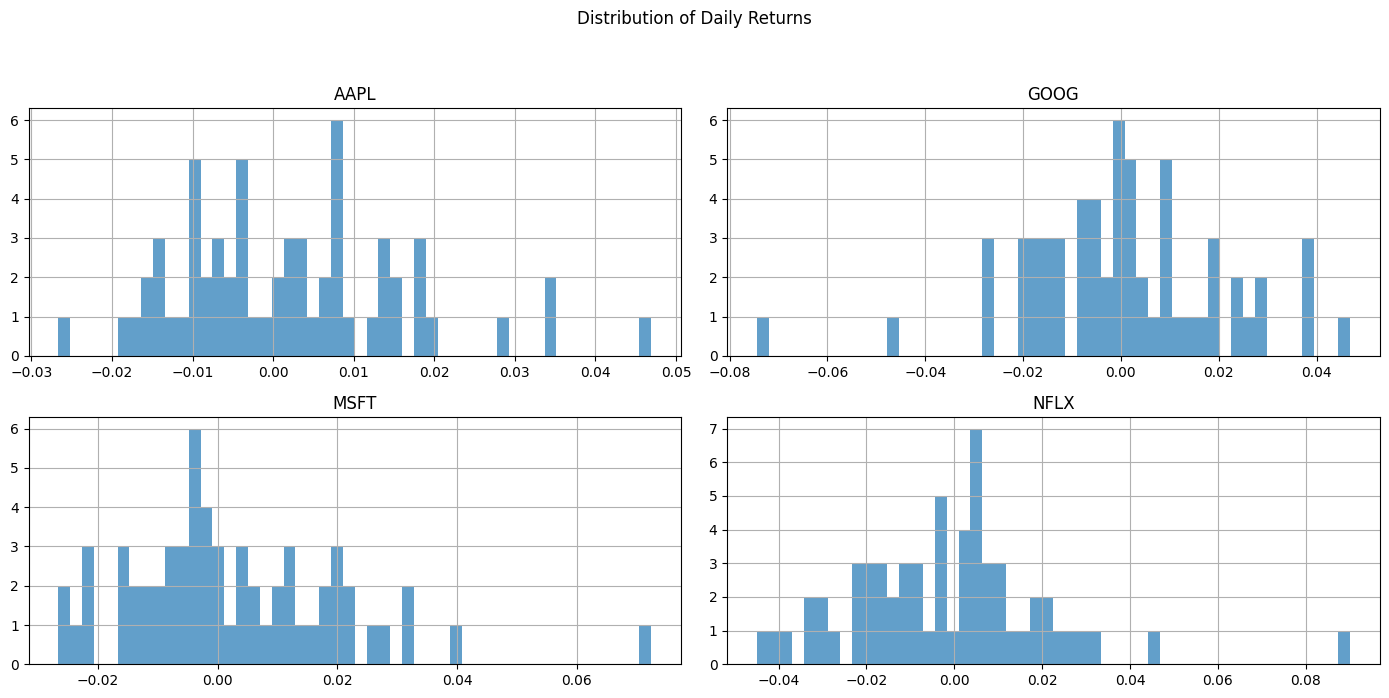

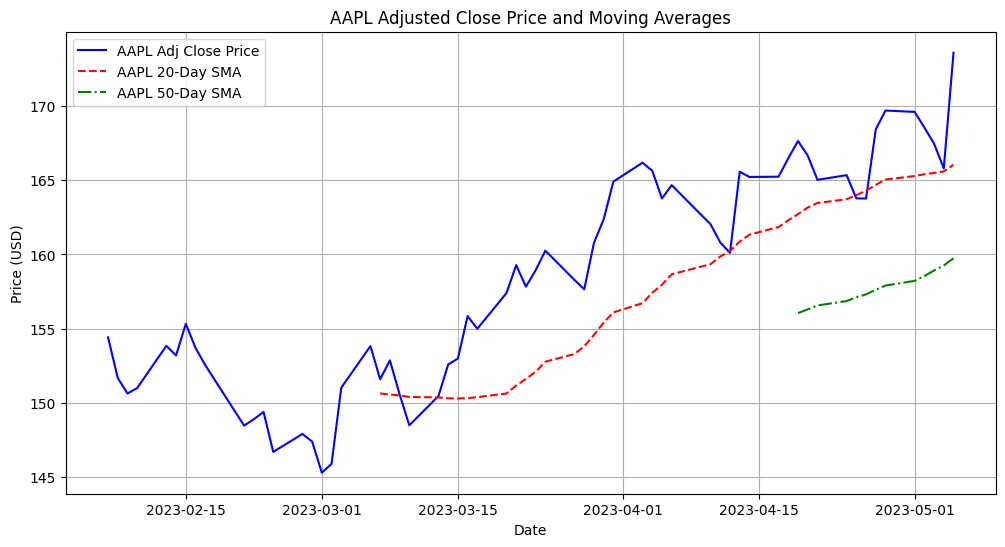

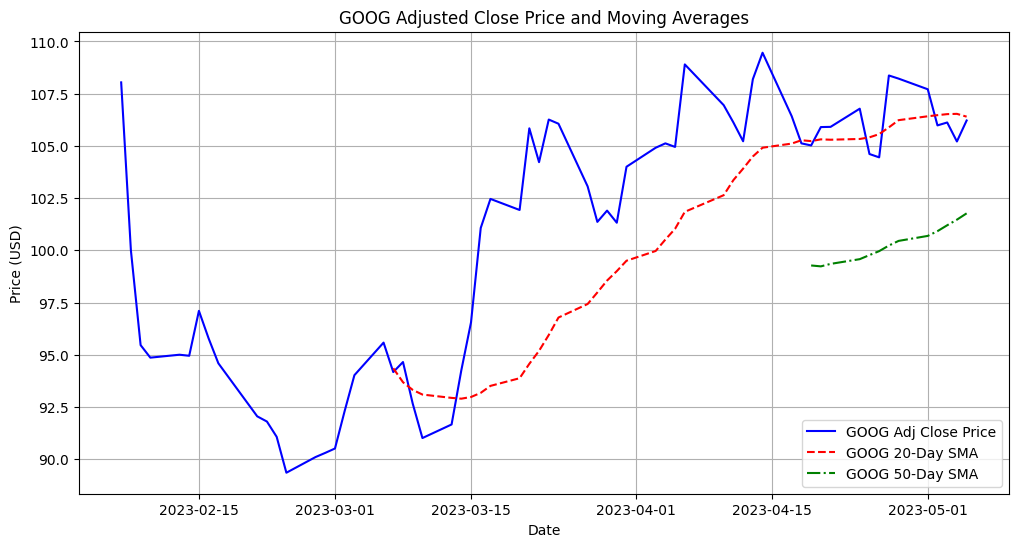

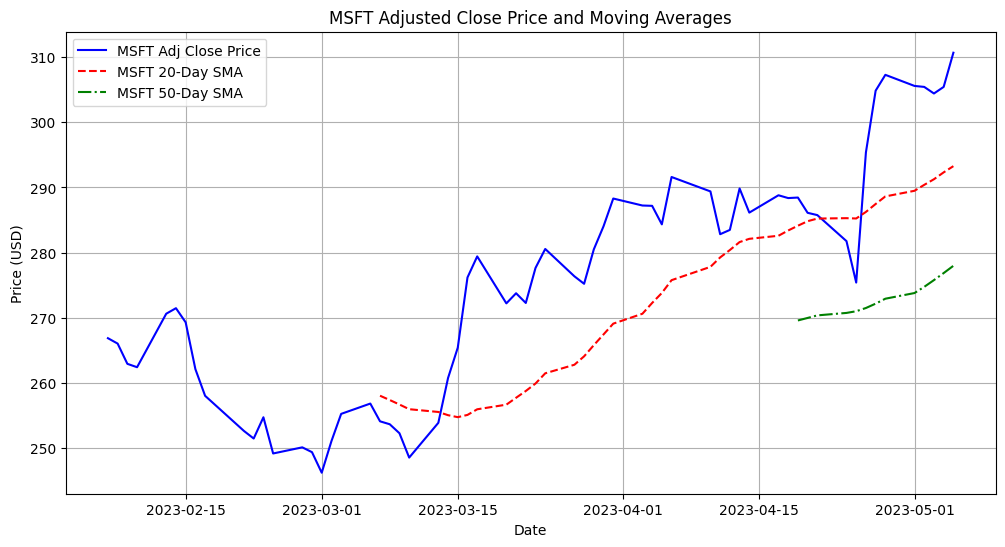

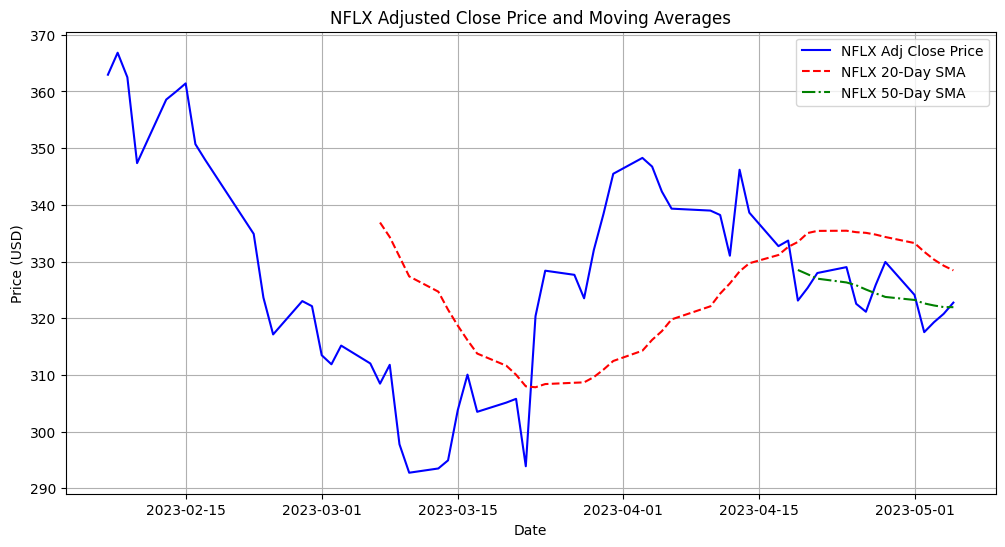


First few rows of 20-day Rolling Volatility:
Ticker          AAPL      GOOG      MSFT      NFLX
Date                                              
2023-03-08  0.015050  0.023144  0.014748  0.019147
2023-03-09  0.014896  0.017192  0.014763  0.020382
2023-03-10  0.015139  0.014574  0.014881  0.020435
2023-03-13  0.015444  0.014688  0.015832  0.019225
2023-03-14  0.015175  0.016134  0.015397  0.017041


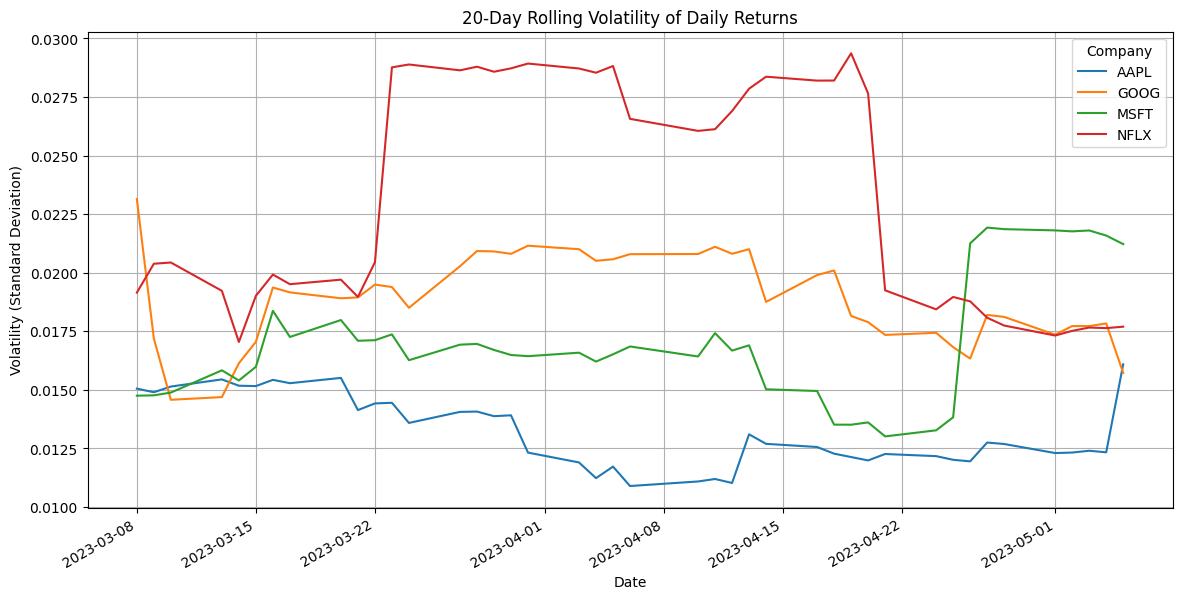


Correlation Matrix of Daily Returns:
Ticker      AAPL      GOOG      MSFT      NFLX
Ticker                                        
AAPL    1.000000  0.643915  0.571068  0.504883
GOOG    0.643915  1.000000  0.519952  0.404993
MSFT    0.571068  0.519952  1.000000  0.433438
NFLX    0.504883  0.404993  0.433438  1.000000


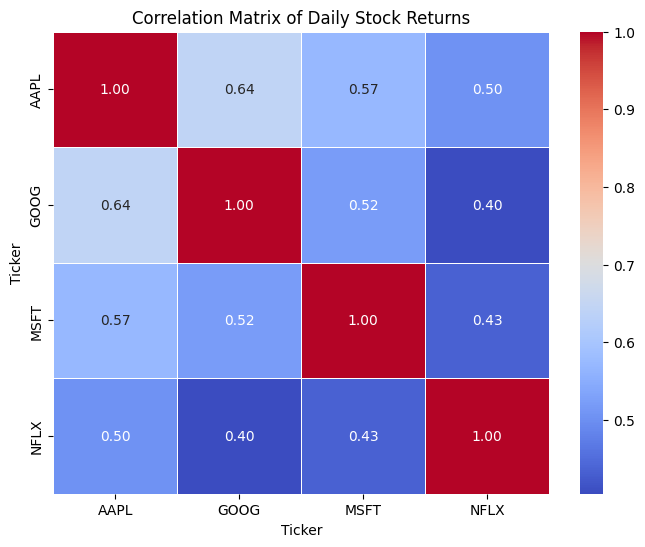


--- Project Analysis Summary ---

1. Stock Performance Comparison:
   - Observe the Adjusted Close Price chart to see overall trends.
   - Total percentage change over the period:
     - AAPL: 12.41%
     - GOOG: -1.69%
     - MSFT: 16.40%
     - NFLX: -11.07%
     - AAPL_SMA_20: nan%
     - AAPL_SMA_50: nan%
     - GOOG_SMA_20: nan%
     - GOOG_SMA_50: nan%
     - MSFT_SMA_20: nan%
     - MSFT_SMA_50: nan%
     - NFLX_SMA_20: nan%
     - NFLX_SMA_50: nan%

2. Trends and Patterns (Moving Averages):
   - Analyze how 20-day and 50-day SMAs behave relative to the stock price.
   - Look for trends (uptrend, downtrend) and potential reversals indicated by SMA crossovers.

3. Volatility Analysis:
   - Compare the 20-day rolling volatility charts.
   - Identify which stocks were most volatile and least volatile during the period.
   - Average 20-day volatility for each stock:
Ticker
AAPL    0.013212
GOOG    0.018871
MSFT    0.017001
NFLX    0.023228
dtype: float64

4. Correlation Analysis:
 

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# No need for train_test_split, StandardScaler, LinearRegression, etc. if not doing predictive ML

# --- Step 1 & 2: Data Collection & Initial Load ---
# Assume you have downloaded the dataset and it's named 'stocks.csv'
# If the dataset structure is different (e.g., one file per stock),
# you'd need to adapt the loading part.
# For simplicity, let's assume a structure similar to what yfinance might give,
# or that your downloaded CSV has columns for Date and then stock-specific prices.
# Based on the Kaggle link in the sample report, 'stocks.csv' seems to be the file.

# Try to load the data. Adjust path as needed.
try:
    data = pd.read_csv('stocks.csv')
except FileNotFoundError:
    print("stocks.csv not found. Please ensure the dataset is in the correct directory.")
    print("If you are using the Kaggle dataset, ensure it's extracted and available.")
    # Fallback/Demonstration with yfinance if no local file
    print("Attempting to download data using yfinance for demonstration purposes...")
    import yfinance as yf
    tickers = ['AAPL', 'MSFT', 'NFLX', 'GOOG']
    start_date = '2025-03-01' # Roughly 3 months ago from current date
    end_date = '2025-06-07' # Current date
    
    data_list = []
    for ticker in tickers:
        df_ticker = yf.download(ticker, start=start_date, end=end_date)
        df_ticker['Ticker'] = ticker
        data_list.append(df_ticker)
    data = pd.concat(data_list)
    data.reset_index(inplace=True)
    print("Data downloaded using yfinance.")


print("First few rows of the dataset:")
print(data.head())
print("\nDataset Info:")
data.info()

# --- Step 3: Data Preparation ---

# Convert 'Date' column to datetime objects
data['Date'] = pd.to_datetime(data['Date'])

# Set 'Date' as index for time series operations, and sort
data = data.set_index('Date').sort_index()

# Handle missing values (if any)
print(f"\nMissing values before dropping: {data.isnull().sum().sum()}")
data.dropna(inplace=True)
print(f"Missing values after dropping: {data.isnull().sum().sum()}")

# Assuming the data is in 'long' format (Date, Ticker, Open, High, Low, Close, Adj Close, Volume)
# If it's in 'wide' format (Date, AAPL_Close, MSFT_Close, etc.), adjustments are needed.
# Let's pivot the data to have 'Close' prices for each ticker as columns
# This is crucial for correlation analysis across stocks
pivot_data = data.pivot_table(index='Date', columns='Ticker', values='Adj Close')
print("\nPivoted 'Adj Close' prices:")
print(pivot_data.head())

# --- Step 4: Exploratory Data Analysis (EDA) & Feature Engineering ---

# 4.1. Visualize Adjusted Close Price over time for all companies
plt.figure(figsize=(14, 7))
pivot_data.plot(ax=plt.gca()) # Use ax=plt.gca() with pivot_data.plot
plt.title('Adjusted Close Price Over Time')
plt.xlabel('Date')
plt.ylabel('Adjusted Close Price (USD)')
plt.legend(title='Company')
plt.grid(True)
plt.show()

# 4.2. Calculate Daily Returns
# Daily returns are typically calculated on Adjusted Close price
daily_returns = pivot_data.pct_change().dropna()
print("\nFirst few rows of Daily Returns:")
print(daily_returns.head())

# Visualize distribution of Daily Returns
plt.figure(figsize=(14, 7))
daily_returns.hist(bins=50, figsize=(14, 7), alpha=0.7)
plt.suptitle('Distribution of Daily Returns', y=1.02)
plt.tight_layout(rect=[0, 0.03, 1, 0.98]) # Adjust layout to prevent title overlap
plt.show()

# 4.3. Calculate Moving Averages (e.g., 20-day, 50-day SMA)
# We'll calculate for each stock and visualize them on separate plots for clarity
for ticker in pivot_data.columns:
    plt.figure(figsize=(12, 6))
    plt.plot(pivot_data[ticker], label=f'{ticker} Adj Close Price', color='blue')
    
    # Calculate 20-day and 50-day Simple Moving Averages
    pivot_data[f'{ticker}_SMA_20'] = pivot_data[ticker].rolling(window=20).mean()
    pivot_data[f'{ticker}_SMA_50'] = pivot_data[ticker].rolling(window=50).mean()
    
    plt.plot(pivot_data[f'{ticker}_SMA_20'], label=f'{ticker} 20-Day SMA', color='red', linestyle='--')
    plt.plot(pivot_data[f'{ticker}_SMA_50'], label=f'{ticker} 50-Day SMA', color='green', linestyle='-.')
    
    plt.title(f'{ticker} Adjusted Close Price and Moving Averages')
    plt.xlabel('Date')
    plt.ylabel('Price (USD)')
    plt.legend()
    plt.grid(True)
    plt.show()

# 4.4. Calculate Volatility (Rolling Standard Deviation of Daily Returns)
rolling_volatility = daily_returns.rolling(window=20).std().dropna() # 20-day rolling volatility
print("\nFirst few rows of 20-day Rolling Volatility:")
print(rolling_volatility.head())

# Visualize Rolling Volatility
plt.figure(figsize=(14, 7))
rolling_volatility.plot(ax=plt.gca())
plt.title('20-Day Rolling Volatility of Daily Returns')
plt.xlabel('Date')
plt.ylabel('Volatility (Standard Deviation)')
plt.legend(title='Company')
plt.grid(True)
plt.show()

# 4.5. Correlation Analysis of Daily Returns
correlation_matrix = daily_returns.corr()
print("\nCorrelation Matrix of Daily Returns:")
print(correlation_matrix)

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix of Daily Stock Returns')
plt.show()

# --- Step 5, 6, 7, 8: Model Selection, Training, Evaluation, Tuning (Conceptual for Analysis) ---
# As discussed, for an intermediate data analyst project focusing on analysis,
# these steps are interpreted as applying and interpreting the analytical techniques.

# Interpretation of Results:
# - Moving Averages: Observe crossovers (e.g., 20-day crossing 50-day) as potential signals.
# - Volatility: Higher volatility indicates higher risk/fluctuation. Compare companies.
# - Correlation Matrix:
#   - Values close to 1: Strong positive correlation (move in the same direction).
#   - Values close to -1: Strong negative correlation (move in opposite directions).
#   - Values close to 0: Little to no linear correlation.
#   - This helps in understanding diversification benefits. If stocks are highly correlated,
#     diversifying among them might not reduce risk much.

# --- Step 9: Deployment (Reporting) ---
# The output of this project would be a comprehensive report summarizing the findings.
# This would typically be a Jupyter Notebook or a PDF generated from it.

# Example summary points for the report:
print("\n--- Project Analysis Summary ---")
print("\n1. Stock Performance Comparison:")
print("   - Observe the Adjusted Close Price chart to see overall trends.")
print(f"   - Total percentage change over the period:")
for ticker in pivot_data.columns:
    start_price = pivot_data[ticker].iloc[0]
    end_price = pivot_data[ticker].iloc[-1]
    pct_change = ((end_price - start_price) / start_price) * 100
    print(f"     - {ticker}: {pct_change:.2f}%")

print("\n2. Trends and Patterns (Moving Averages):")
print("   - Analyze how 20-day and 50-day SMAs behave relative to the stock price.")
print("   - Look for trends (uptrend, downtrend) and potential reversals indicated by SMA crossovers.")

print("\n3. Volatility Analysis:")
print("   - Compare the 20-day rolling volatility charts.")
print("   - Identify which stocks were most volatile and least volatile during the period.")
print(f"   - Average 20-day volatility for each stock:")
print(rolling_volatility.mean())

print("\n4. Correlation Analysis:")
print("   - Review the correlation heatmap of daily returns.")
print("   - Identify highly correlated pairs (e.g., MSFT and GOOG often have high positive correlation).")
print("   - Explain the implications for portfolio diversification.")
print("     - High positive correlation suggests they tend to move in tandem, offering less diversification.")
print("     - Lower correlation suggests they behave more independently, aiding diversification.")
